In [24]:
import torchaudio
from audiolm_pytorch import SoundStream
import torch
import utils.exploratoryUtils as exU
from matplotlib import pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
testTess = torchaudio.load("/home/ckwdani/Music/emotionDatasets/converted/tess/OAF_happy/OAF_beg_happy.flac")
soundstream = SoundStream(
    codebook_size = 1024,
    rq_num_quantizers = 8,
   attn_window_size = 256,       # local attention receptive field at bottleneck
    attn_depth = 2).to(device)
with torch.no_grad():
    soundstream.load("/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/models/soundstream_model/soundstream.44000.pt")
    testForward = soundstream(testTess[0].to(device), return_encoded = True)


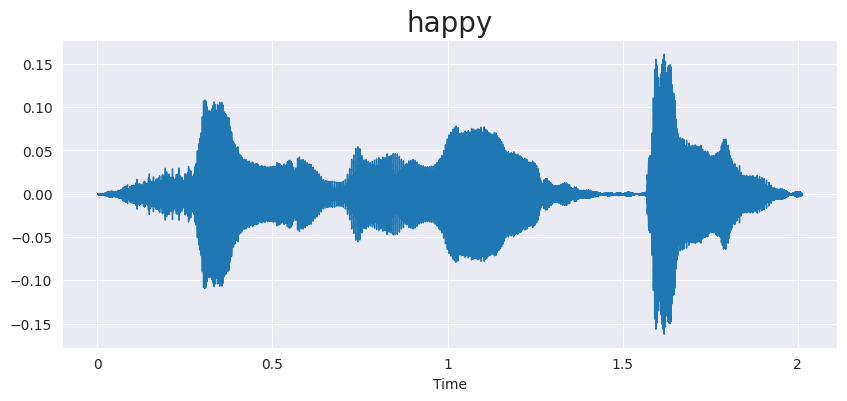

In [36]:
exU.waveplot(testTess[0][0].numpy(), 16000, "happy")

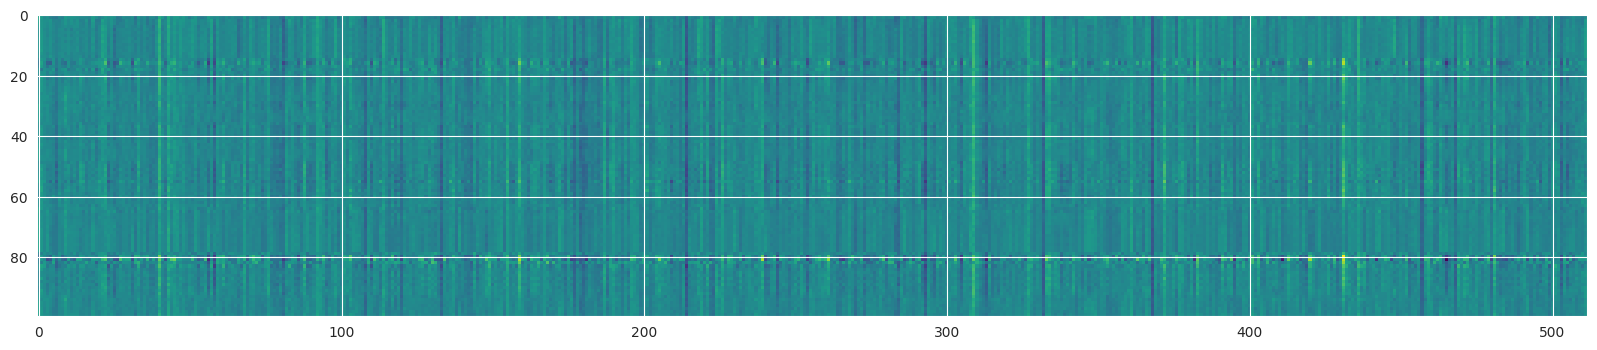

In [40]:
figure = plt.figure(figsize=(20, 10))
plt.imshow(testForward[0][0].T.cpu().numpy(), cmap="viridis")